In [1]:
import os
import os.path as op
# import mne
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from scipy.stats import ttest_1samp

### Coherence

#### Load data

In [4]:
data = {}
root = Path('../data/bids/derivatives/decoding/')
for file in root.rglob("*"):
    if '_coh' not in file.name:
        continue
    print(file)
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    if len(value) != 5:
        print(file)
        print(f'Wrong shape: {len(value)} instead of 5')
        continue
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

#### Reshape data for seaborn

In [16]:
# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()
df_sns = df_sns.rename(columns={"index": "cond"})

#### Plot

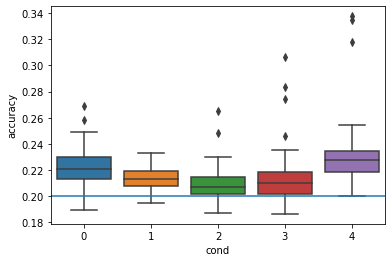

In [22]:
graph = sns.boxplot(data = df_sns, x = "cond", y = "accuracy")
graph.axhline(0.2)

### Imaginary Coherence

#### Load data

In [2]:
data = {}
root = Path('../data/bids/derivatives/decoding/')
for file in root.rglob("*"):
    if 'imcoh' not in file.name:
        continue
    print(file)
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    if len(value) != 5:
        print(file)
        print(f'Wrong shape: {len(value)} instead of 5')
        continue
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

../data/bids/derivatives/decoding/sub-7/sub-7_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-23/sub-23_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-28/sub-28_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-34/sub-34_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-39/sub-39_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-40/sub-40_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-27/sub-27_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-8/sub-8_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-33/sub-33_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-1_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-2_desc-imcoh_scores.npy
../data/bids/derivatives/decoding/sub-13/sub-13

#### Reshape data for seaborn

In [3]:
# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()
df_sns = df_sns.rename(columns={"index": "cond"})

#### Plot

(0.18, 0.34)

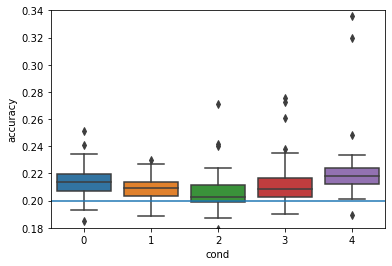

In [5]:
graph = sns.boxplot(data = df_sns, x = "cond", y = "accuracy")
graph.axhline(0.2)
graph.set_ylim(0.18, 0.34)

### Coherence with each possible stim

#### Load data

In [3]:
data = {}
root = Path('../data/bids/derivatives/decoding/')
for file in root.rglob("*"):
    if 'coh-for' not in file.name:
        continue
    print(file)
    key = re.findall('(.*?)_desc', file.name)[0]
    value = np.load(file)
    if len(value) != 5:
        print(file)
        print(f'Wrong shape: {len(value)} instead of 5')
        continue
    data[key] = value

df = pd.DataFrame.from_dict(data)
df = df.transpose()

../data/bids/derivatives/decoding/sub-7/sub-7_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-23/sub-23_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-28/sub-28_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-34/sub-34_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-39/sub-39_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-40/sub-40_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-27/sub-27_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-8/sub-8_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-33/sub-33_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/derivatives/decoding/sub-38/sub-38_task-pitch_run-1_desc-coh-for-each-stim_scores.npy
../data/bids/d

#### Reshape for seaborn

In [4]:
# Rename columns for easy transformation
df_sns = df.T
cols = list(df_sns.columns)
filter_cols = re.compile('(sub-\d{1,2})_')
subs = list(map(filter_cols.findall, cols))
subs = list(itertools.chain(*subs))
df_sns.columns = subs
df_sns = df_sns.reset_index()

# Pivot data
df_sns = pd.wide_to_long(df_sns, stubnames = 'sub-', i = 'index', j = 'sub')
df_sns.columns = ['accuracy']
df_sns = df_sns.reset_index()
df_sns = df_sns.rename(columns={"index": "cond"})

#### Plot

(0.18, 0.34)

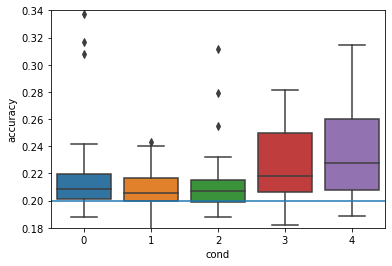

In [5]:
graph = sns.boxplot(data = df_sns, x = "cond", y = "accuracy")
graph.axhline(0.2)
graph.set_ylim(0.18, 0.34)